Angles where Freedman's inequality is satisfied: [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75, 12.0, 12.25, 12.5, 12.75, 13.0, 13.25, 13.5, 13.75, 14.0, 14.25, 14.5, 14.75, 15.0, 15.25, 15.5, 15.75, 16.0, 16.25, 16.5, 16.75, 17.0, 17.25, 17.5, 17.75, 18.0, 18.25, 18.5, 18.75, 19.0, 19.25, 19.5, 19.75, 20.0, 20.25, 20.5, 20.75, 21.0, 21.25, 21.5, 22.0, 23.5, 25.5, 26.0, 26.25, 27.0, 27.25, 27.5, 27.75, 28.0, 28.5, 28.75, 29.0, 29.5, 29.75, 30.0, 30.25, 30.5, 30.75, 31.0, 31.25, 31.5, 31.75, 32.0, 32.25, 32.5, 32.75, 33.0, 33.25, 33.5, 33.75, 34.0, 34.25, 34.5, 34.75, 35.0, 35.25, 35.5, 35.75, 36.0, 36.25, 36.5, 36.75, 37.0, 37.25, 37.5, 37.75, 38.0, 38.25, 38.5, 38.75, 39.0, 39.25, 39.5, 39.75, 40.0, 40.25, 40.5, 40.75, 41.0, 41.25, 41.5, 41.75, 42.0, 42.25, 42.5,

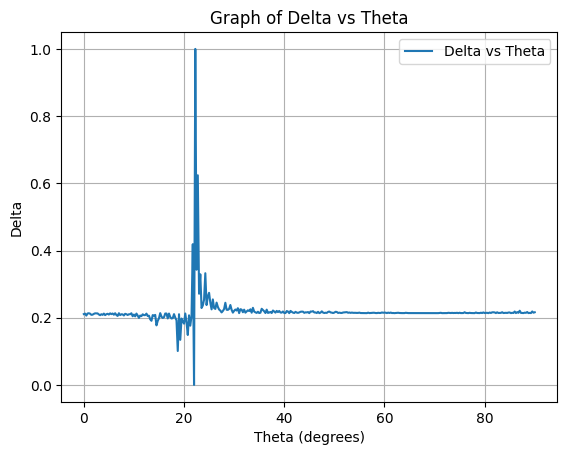

In [45]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Function to run the Bell test experiment
def run_bell_test_experiment(angle_a, angle_b):
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.ry(2 * angle_a, 0)
    qc.ry(2 * angle_b, 1)
    qc.measure(0, 0)
    qc.measure(1, 1)
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    return counts

# Function to calculate N(ϕ)
def calculate_N(counts):
    coincidences = counts.get('00', 0) + counts.get('11', 0)
    anti_coincidences = counts.get('01', 0) + counts.get('10', 0)
    return coincidences - anti_coincidences

# Fixed angle_b
angle_b = np.deg2rad(67.5)

# Lists to hold results and plotting data
violation_angles = []
satisfaction_angles = []
theta_values = []
delta_values = []

# Run experiment and check Freedman’s inequality over a range of angles
for degree in np.arange(0, 90.25, 0.25):
    angle_a = np.deg2rad(degree)

    counts_a = run_bell_test_experiment(angle_a, angle_b)
    counts_b = run_bell_test_experiment(angle_b, angle_a)

    N_a = calculate_N(counts_a)
    N_b = calculate_N(counts_b)

    delta = abs(N_a - N_b) / N_b - 0.25
    # print(delta,degree)

    theta_values.append(degree)
    delta_values.append(delta)

    if delta <= 0:
        satisfaction_angles.append(degree)
    else:
        violation_angles.append(degree)

# Print angle lists
print(f"Angles where Freedman's inequality is satisfied: {satisfaction_angles}")
print(f"Angles where Freedman's inequality is violated: {violation_angles}")

min_delta = np.min(delta_values)
max_delta = np.max(delta_values)
rescaled_delta_values = [((delta - min_delta) / (max_delta - min_delta)) for delta in delta_values]
print(rescaled_delta_values,degree)

# max_abs_delta = max(abs(delta) for delta in delta_values)
# delta_values_1 = [delta / max_abs_delta for delta in delta_values]
# Plot the graph
plt.plot(theta_values,rescaled_delta_values, label='Delta vs Theta')
plt.xlabel('Theta (degrees)')
plt.ylabel('Delta')
plt.title('Graph of Delta vs Theta')
plt.legend()
plt.grid(True)
plt.show()